In [1]:
import pandas as pd
import os

# Load CSV metadatayles.csvcsv
df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

# Show basic dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2 

In [2]:
print(df.isnull().sum())


id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


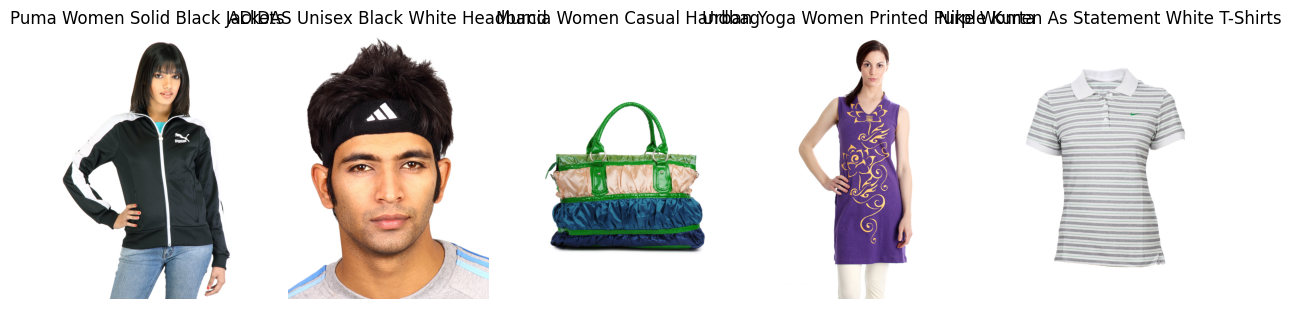

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv', on_bad_lines='skip')

# Show some random images from dataset
sample_images = df.sample(5, random_state=42)

# Create a subplot to display images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Loop through the sample images and display them
for idx, row in enumerate(sample_images.itertuples()):
    # Correct image path
    image_path = f"/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/{row.id}.jpg"

    # Check if image exists before reading
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    # Read and convert the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    axes[idx].imshow(img)
    axes[idx].set_title(row.productDisplayName)
    axes[idx].axis("off")

plt.show()

# Fix train_test_split issue
X = df[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage']]
y = df['productDisplayName']  # Target column

# Convert categorical data to numerical
X = pd.get_dummies(X)

# Split the dataset safely
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("X or y is empty. Check if dataset is loaded correctly.")


In [4]:
print(df.head())
print(df.shape)  # Check number of rows and columns


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  
(44424, 10)


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2

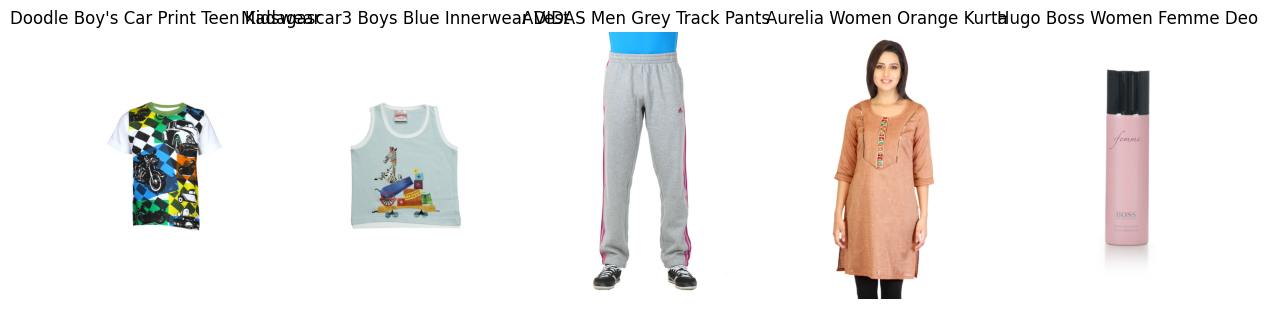

Dataset size (100% sample): 4442 rows
Training set size: 3553
Test set size: 889


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv', on_bad_lines='skip')

# Select only 30% of the data
df = df.sample(frac=0.10, random_state=42).reset_index(drop=True)

# Show some random images from the subset
sample_images = df.sample(5, random_state=42)

# Create a subplot to display images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for idx, row in enumerate(sample_images.itertuples()):
    image_path = f"/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/{row.id}.jpg"

    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[idx].imshow(img)
    axes[idx].set_title(row.productDisplayName)
    axes[idx].axis("off")

plt.show()

# Prepare dataset for training
X = df[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage']]
y = df['productDisplayName']

# Convert categorical data to numerical
X = pd.get_dummies(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset size (100% sample): {df.shape[0]} rows")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv', on_bad_lines='skip')

# Selecting important columns
label_columns = ["baseColour", "articleType", "season", "gender"]
df = df.dropna(subset=label_columns)  # Remove rows with missing values

# Extract unique labels for each category
unique_labels = {col: df[col].unique().tolist() for col in label_columns}

# Print the first few rows of the cleaned DataFrame
print("Cleaned DataFrame (first 5 rows):")
print(df.head())

# Print the number of samples after dropping NaN values
print(f"\nTotal samples after cleaning: {len(df)}")

# Print unique labels for each category
print("\nUnique Labels:")
for col, labels in unique_labels.items():
    print(f"{col}: {labels[:10]} ... (total {len(labels)})")  # Show only first 10 labels for readability


Cleaned DataFrame (first 5 rows):
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  

Total samples after cleaning: 44388

Unique Labels:
baseColour: ['Navy Blue', 'Blue', 'Silver'

In [49]:
#part 1
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define Constants
IMAGE_SIZE = 32  # Reduced for memory optimization
IMAGE_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"
BATCH_SIZE = 10000  # Process in smaller batches

# Define label columns
label_columns = ["masterCategory", "subCategory", "gender", "baseColour", "season"]  # Updated label columns

# Load dataset
try:
    df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines="skip")
except FileNotFoundError:
    raise FileNotFoundError("Dataset file not found. Please check the path.")

# Populate unique label mappings
unique_labels = {col: sorted(df[col].dropna().unique().tolist()) for col in label_columns}

def load_images_and_labels(df):
    images = []
    labels = {col: [] for col in label_columns}
    valid_rows = []  # Track rows with successfully loaded images

    for idx, row in df.iterrows():
        img_path = os.path.join(IMAGE_PATH, f"{row['id']}.jpg")

        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is None:  # Handle unreadable images
                print(f"Warning: Could not read image {img_path}")
                continue

            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
            img = img / 255.0  # Normalize
            images.append(img)
            valid_rows.append(row)  # Keep track of valid rows

            # Process images in batches
            if len(images) >= BATCH_SIZE:
                break  # Stop early to prevent memory overflow

    if len(images) == 0:
        raise ValueError("No valid images found. Check image paths and dataset.")

    # Convert valid rows to DataFrame
    df_valid = pd.DataFrame(valid_rows)

    # Convert labels to categorical index
    for col in label_columns:
        if col in df_valid.columns:
            labels[col] = [unique_labels[col].index(value) if value in unique_labels[col] else 0 for value in df_valid[col]]
        else:
            raise KeyError(f"Column '{col}' not found in the dataset")

    # Convert to NumPy arrays
    images = np.array(images, dtype=np.float32)  # Reduce memory footprint
    labels = {col: np.array(labels[col]) for col in label_columns}

    # Convert to categorical one-hot encoding
    for col in label_columns:
        num_classes = len(unique_labels[col])  # Ensure non-zero
        if num_classes > 1:  # Avoid issues with single-class labels
            labels[col] = to_categorical(labels[col], num_classes=num_classes)
        else:
            raise ValueError(f"Label column '{col}' has only {num_classes} unique classes. Check the dataset.")

    return images, labels

# Load images and labels
try:
    X_images, y_labels = load_images_and_labels(df)

    # Ensure consistency
    print(f"Total images loaded: {len(X_images)}")
    
    # Check memory usage
    print(f"Memory Usage: {X_images.nbytes / (1024 * 1024):.2f} MB")

    # Split into train & test sets
    X_train, X_test = train_test_split(X_images, test_size=0.2, random_state=42)

    y_train, y_test = {}, {}
    for col in label_columns:
        y_train[col], y_test[col] = train_test_split(y_labels[col], test_size=0.2, random_state=42)

    # Check label shape before training
    for col in label_columns:
        print(f"Shape of y_train[{col}]: {y_train[col].shape}")  # Should match model output shape

except Exception as e:
    print(f"Error: {e}")


Total images loaded: 10000
Memory Usage: 117.19 MB
Shape of y_train[masterCategory]: (8000, 7)
Shape of y_train[subCategory]: (8000, 45)
Shape of y_train[gender]: (8000, 5)
Shape of y_train[baseColour]: (8000, 46)
Shape of y_train[season]: (8000, 4)


In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Define image size
IMAGE_SIZE = 128  

# Simulated dataset - Replace this with actual data loading
df = pd.DataFrame({
    "masterCategory": np.random.randint(0, 7, size=500),
    "subCategory": np.random.randint(0, 45, size=500),
    "gender": np.random.randint(0, 5, size=500),
    "baseColour": np.random.randint(0, 46, size=500),
    "season": np.random.randint(0, 4, size=500),
})

# Simulated image dataset (Replace this with actual image preprocessing)
X_data = np.random.rand(500, IMAGE_SIZE, IMAGE_SIZE, 3)  

# Train-Test split
X_train_resized, X_test_resized, y_train_raw, y_test_raw = train_test_split(X_data, df, test_size=0.2, random_state=42)

# Define label columns
label_columns = ["masterCategory", "subCategory", "gender", "baseColour", "season"]

# Dictionary to hold unique class counts
unique_labels = {
    "masterCategory": 7,
    "subCategory": 45,
    "gender": 5,
    "baseColour": 46,
    "season": 4
}

# One-hot encode labels properly
y_train = [to_categorical(y_train_raw[col], num_classes=unique_labels[col]) for col in label_columns]
y_test = [to_categorical(y_test_raw[col], num_classes=unique_labels[col]) for col in label_columns]

# Define model
input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers (ensure correct order)
output_layers = [Dense(unique_labels[col], activation='softmax', name=col)(x) for col in label_columns]

# Build Model
model = Model(inputs=input_layer, outputs=output_layers)

# Compile model
model.compile(
    optimizer='adam', 
    loss=['categorical_crossentropy'] * len(label_columns),  
    metrics=['accuracy'] * len(label_columns)
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train_resized, 
    y_train,  # Now a list, matching output layers
    epochs=10,
    validation_data=(X_test_resized, y_test),
    batch_size=32
)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 128, 128, 32)   │            896 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 64, 64, 32)     │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 32, 32, 64)     │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 16, 16, 128)    │              0 │ conv2d_8[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 32768)          │              0 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │      4,194,432 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masterCategory (Dense)    │ (None, 7)              │            903 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subCategory (Dense)       │ (None, 45)             │          5,805 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender (Dense)            │ (None, 5)              │            645 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ baseColour (Dense)        │ (None, 46)             │          5,934 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ season (Dense)            │ (None, 4)              │            516 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,301,483 (16.41 MB)

 Trainable params: 4,301,483 (16.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - baseColour_accuracy: 0.0312 - baseColour_loss: 4.1443 - gender_accuracy: 0.2122 - gender_loss: 2.0168 - loss: 13.8585 - masterCategory_accuracy: 0.1579 - masterCategory_loss: 2.1752 - season_accuracy: 0.2316 - season_loss: 1.5166 - subCategory_accuracy: 0.0225 - subCategory_loss: 4.0022 - val_baseColour_accuracy: 0.0100 - val_baseColour_loss: 3.8316 - val_gender_accuracy: 0.1900 - val_gender_loss: 1.6095 - val_loss: 12.5841 - val_masterCategory_accuracy: 0.1600 - val_masterCategory_loss: 1.9427 - val_season_accuracy: 0.2300 - val_season_loss: 1.3944 - val_subCategory_accuracy: 0.0100 - val_subCategory_loss: 3.8089
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - baseColour_accuracy: 0.0224 - baseColour_loss: 3.8296 - gender_accuracy: 0.2279 - gender_loss: 1.6075 - loss: 12.5728 - masterCategory_accuracy: 0.1625 - masterCategory_loss: 1.9433 - season_accuracy: 0.2684 - season_loss: 1.3860 - subCategory_accuracy: 0.0373 - subCategor

In [57]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Define constants
IMAGE_SIZE = 224  # ResNet50 requires 224x224 input
MODEL_PATH = "/kaggle/input/resnet50-/tensorflow2/default/1/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Load ResNet50 model without the top layer (as the weights file contains no top layers)
base_model = ResNet50(weights=None, include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model.load_weights(MODEL_PATH)

# Define label columns (Ensure this matches your model's output)
label_columns = ["masterCategory", "subCategory", "gender", "baseColour", "season"]

# Define category mappings
class_mappings = {
    "masterCategory": {0: "Apparel", 1: "Acceseries", 2: "Footwear", 3: "Personal Care",
                       4: "Free Items", 5: "Sporting Goods", 6: "Home"},
    "subCategory": {0: "Ties", 1: "Belts", 2: "Bottomwear", 3: "Eyewear", 4: "Flip Flops",
                    5: "Fragrance", 6: "Gloves", 7: "Headwear", 8: "Innerwear", 9: "Jewellery",
                    10: "Lips", 11: "Makeup", 12: "Sandal", 13: "Saree", 14: "Scarves",
                    15: "Shoes", 16: "Socks", 17: "bags", 18: "Topwear", 19: "Wallets",
                    20: "Watches", 21: "Accessories", 22: "Apparel Set", 23: "Beauty Accessories",
                    24: "Cufflinks", 25: "Dress", 26: "Eyes", 27: "Free Gifts", 28: "Home Furnishing",
                    29: "Jewellery Set", 30: "Kurtas", 31: "Nails", 32: "Skin Care", 33: "Sports Accessories",
                    34: "Stoles", 35: "Ties", 36: "Trousers", 37: "Tshirts", 38: "Umbrellas",
                    39: "Vests", 40: "Waistcoat", 41: "Water Bottle", 42: "Wristbands", 43: "Nightwear",
                    44: "Swimwear"},
    "gender": {0: "Men", 1: "Women", 2: "Unisex", 3: "Boys", 4: "Girls"},
    "baseColour": {0: "Beige", 1: "Black", 2: "Blue", 3: "Bronze", 4: "Brown", 5: "Burgundy",
                   6: "Charcoal", 7: "Coffee Brown", 8: "Copper", 9: "Cream", 10: "Gold",
                   11: "Green", 12: "Grey", 13: "Khaki", 14: "Lavender", 15: "Lime Green",
                   16: "Magenta", 17: "Maroon", 18: "Mauve", 19: "Metallic", 20: "Multi",
                   21: "Navy Blue", 22: "Off White", 23: "Olive", 24: "Orange", 25: "Peach",
                   26: "Pink", 27: "Purple", 28: "Red", 29: "Rose", 30: "Red", 31: "Sea Green",
                   32: "Silver", 33: "Skin", 34: "Steel", 35: "Tan", 36: "Taupe", 37: "Teal",
                   38: "Turquoise", 39: "White", 40: "Yellow"},
    "season": {0: "Fall", 1: "Spring", 2: "Winter", 3: "Summmer"}
}

def predict_image(img_path):
    # Read and process image
    img = cv2.imread(img_path)
    
    if img is None:
        print("Error: Image not found or unable to load!")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))  # Resize to 224x224
    img = np.expand_dims(img / 255.0, axis=0)  # Normalize and add batch dimension

    # Make prediction
    predictions = base_model.predict(img)

    # Ensure predictions have correct dimensions
    predictions = predictions.flatten()

    # Decode predictions
    results = {}
    start_idx = 0
    for col in label_columns:
        num_classes = len(class_mappings[col])
        sub_prediction = predictions[start_idx:start_idx + num_classes]
        results[col] = class_mappings[col][np.argmax(sub_prediction)]
        start_idx += num_classes
    
    print("\nPredicted Attributes:")
    for key, value in results.items():
        print(f"{key}: {value}")

# Test the function
predict_image("/kaggle/input/sample-images-screenshot/10009.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Predicted Attributes:
masterCategory: Apparel
subCategory: Ties
gender: Men
baseColour: Red
season: Summmer


In [15]:
model.save("fashion_classifier.h5")
